# The length of the intervals union's 

**TASK** Given segments on a line (starting and ending positions), the task is to find its unions (as list of pairs) and length covered by these segments.

## Algorithm from book

### Implementation

In [0]:
def calculate_lenghth_v1(dots):
  # dots - list length n of pairs (start_point, end_point)
  points = []
  new_points = []
  EXCESS = 0
  m = 0
  
  for dot in dots:
    points += [(dot[0], 1), (dot[1], -1)]  # startpoint: 1, endpoint: -1
  
  points.sort(key=lambda x: (x[0], int(x[1]))) # First endpoint, then startpoint, if first num is the same
  
  for dot in points:
    EXCESS = EXCESS + dot[1] 
    
    if EXCESS==1 and dot[1]==1 and (m==0 or dot[0]!=new_points[-1][1]):  # when jump from 2->1 that isn't begining; (1,2) (2,4) don't want
      m += 1
      new_points.append([dot[0], 0])
    
    if EXCESS==0 and m>0:
      new_points[-1][1] = dot[0]
    
  return ([(dot[0], dot[1]) for dot in new_points], sum([dot[1]-dot[0] for dot in new_points]))

### Code verification

In [0]:
def calculate_lenghth_v1(dots):
  # dots - list length n of pairs (start_point, end_point)
  points = []
  starts = []
  ends = []
  MEASURE = 0
  EXCESS = 0
  m = 0
  
  for dot in dots:
    points += [(dot[0], 1), (dot[1], -1)]  # startpoint: 1, endpoint: -1
  
  points.sort(key=lambda x: (x[0], int(x[1]))) # First endpoint, then startpoint, if first num is the same
  
  for dot in points:
    EXCESS = EXCESS + dot[1] 
    
    if EXCESS==1 and dot[1]==1 and (m==0 or dot[0]!=ends[-1]):  # when jump from 2->1 that isn't begining; (1,2) (2,4) don't want
      m += 1
      starts.append(dot[0])
      ends.append(0)
      #starts[-1] = dot[0]
    
    if EXCESS==0 and m>0:
      ends[-1] = dot[0]
      
    #print(starts, '-', ends)
    #print()
   
  #print(points, '\n', starts, '\n', ends)
  for (start, end) in zip(starts, ends):
    MEASURE += end-start
    
  return ([(start, end) for start, end in zip(starts, ends)], MEASURE)

### Length test

In [2]:
calculate_lenghth_v1([(1,2), (1,3), (1,2)])

([(1, 3)], 2)

In [3]:
calculate_lenghth_v1([(1,2), (3,4), (4,5), (5.5,8), (4,4), (2,4)])

([(1, 5), (5.5, 8)], 6.5)

## My idea from lectures

### Implementation

In [0]:
class Intervaler():
  def __init__(self):
    self.dots = []
    self.n = 0
    
  def isempty(elf):
    return self.n!=0
  
  def getn(self):
    return self.n
 
  def getdots(self):
    return self.dots
  
  def __bsearch(self, x):  # find first index > then x
    low = 0
    high = self.n
  
    while(low!=high):
      mid = (low+high)//2
      if self.dots[mid][0]<=x:
        low = mid + 1
      else:
        high = mid
    return low
  
  def add(self, dot):
    if self.n==0:
      self.dots.insert(0, (dot[0], True))  # True mean (
      self.dots.insert(1, (dot[1], False)) # False mean )
      self.n += 2
      return
    
    i = self.__bsearch(dot[0])
    j = self.__bsearch(dot[1])
    
    if i==0 and j==self.n:
      self.dots.clear()
      self.n = 0
      self.add(dot)
    elif i==0:  # j!=n
      if self.dots[j][1]==True:
        self.dots.insert(0, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[1:j+1]
        self.n = self.n + 2 - j
      else:
        self.dots.insert(0, (dot[0], True))
        del self.dots[1:j+1]
        self.n = self.n +1 - j 
    elif j==self.n:  # i!=0
      if self.dots[i-1][1]==False:
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      else:
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
    else:  # i, j 'in' list
      if self.dots[i-1][1]==False and self.dots[j][1]==True:
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      elif self.dots[i-1][1]==True and self.dots[j][1]==True:
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
      elif self.dots[i-1][1]==False and self.dots[j][1]==False:
        self.dots.insert(i, (dot[0], True))
        del self.dots[i+1:j+1]
        self.n = self.n + 1 - (j-i)
      else:
        del self.dots[i:j]
        self.n = self.n - (j-i)
        
  def calculate_length(self, dots):
    for dot in dots:
      self.add(dot)
    new_dots = []
    j = 0
    for i in range(0, self.n, 2):
      if j==0 or new_dots[j-1][1]!=self.dots[i][0]:
        new_dots.append([self.dots[i][0], self.dots[i+1][0]])
        j += 1
      else:
        new_dots[j-1][1] = self.dots[i+1][0]
    return ([(dot[0], dot[1]) for dot in new_dots], sum([y[0]-x[0] for x, y in zip(self.dots[0::2], self.dots[1::2])]))

### Code verification

In [0]:
# Class in debug mode
class Intervaler():
  def __init__(self):
    self.dots = []
    self.n = 0
    
  def isempty(elf):
    return self.n!=0
  
  def getn(self):
    return self.n
 
  def getdots(self):
    return self.dots
  
  def printf(self):
    print('[', end='')
    for dot in self.dots:
      print('(', dot[0], ')', dot[1], ')', end='')
    print(']')
  
  def _bsearch(self, x):  # find first index 
    low = 0
    high = self.n
    if self.n != len(self.dots):
      print('ERROR')
  
    while(low!=high):
      mid = (low+high)//2
      if self.dots[mid][0]<=x:
        low = mid + 1
      else:
        high = mid
    return low
  
  def add(self, dot):
    if self.n==0:
      print('branch_initial')
      self.dots.insert(0, (dot[0], True))  # True mean (
      self.dots.insert(1, (dot[1], False)) # False mean )
      self.n += 2
      return
    
    i = self._bsearch(dot[0])
    j = self._bsearch(dot[1])
    
    if i==0 and j==self.n:
      print('branch_0')
      self.dots.clear()
      self.n = 0
      self.add(dot)
    elif i==0:  # j!=n
      if self.dots[j][1]==True:
        print('branch_10')
        self.dots.insert(0, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[1:j+1]
        self.n = self.n + 2 - j
      else:
        print('branch_11')
        self.dots.insert(0, (dot[0], True))
        del self.dots[1:j+1]
        self.n = self.n +1 - j 
    elif j==self.n:  # i!=0
      if self.dots[i-1][1]==False:
        print('branch_20')
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      else:
        print('branch_21')
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
    else:  # i, j 'in' list
      #print('FINAL', self.dots[i-1][1], ', ', self.dots[j][1])
      if self.dots[i-1][1]==False and self.dots[j][1]==True:
        print('branch_30')
        self.dots.insert(i, (dot[0], True))
        self.dots.insert(j+1, (dot[1], False))
        del self.dots[i+1:j+1]
        self.n = self.n + 2 - (j-i)
      elif self.dots[i-1][1]==True and self.dots[j][1]==True:
        print('branch_31')
        self.dots.insert(j, (dot[1], False))
        del self.dots[i:j]
        self.n = self.n + 1 - (j-i)
      elif self.dots[i-1][1]==False and self.dots[j][1]==False:
        print('branch_32')
        self.dots.insert(i, (dot[0], True))
        del self.dots[i+1:j+1]
        self.n = self.n + 1 - (j-i)
      else:
        print('branch_33')
        del self.dots[i:j]
        self.n = self.n - (j-i)

In [182]:
i = Intervaler()
i.printf()

[]


In [183]:
i.add((5,6))
print(i.getdots())
print(i.getn())

branch_initial
[(5, True), (6, False)]
2


In [184]:
i.add((4,7))
print(i.getdots())
print(i.getn())

branch_0
branch_initial
[(4, True), (7, False)]
2


In [185]:
i.add((3,5))
print(i.getdots())
print(i.getn())

branch_11
[(3, True), (7, False)]
2


In [186]:
i.add((1,2))
print(i.getdots())
print(i.getn())

branch_10
[(1, True), (2, False), (3, True), (7, False)]
4


In [187]:
i.add((0, 2.5))
print(i.getdots())
print(i.getn())

branch_10
[(0, True), (2.5, False), (3, True), (7, False)]
4


In [188]:
i.add((2.8, 8))
print(i.getdots())
print(i.getn())

branch_20
[(0, True), (2.5, False), (2.8, True), (8, False)]
4


In [189]:
i.add((1,9))
print(i.getdots())
print(i.getn())

branch_21
[(0, True), (9, False)]
2


In [190]:
i.add((-4,-2))
print(i.getdots())
print(i.getn())

branch_10
[(-4, True), (-2, False), (0, True), (9, False)]
4


In [191]:
i.add((-1, -0.5))
print(i.getdots())
print(i.getn())

branch_30
[(-4, True), (-2, False), (-1, True), (-0.5, False), (0, True), (9, False)]
6


In [192]:
i.add((-3, -0.3))
print(i.getdots())
print(i.getn())

branch_31
[(-4, True), (-0.3, False), (0, True), (9, False)]
4


In [193]:
i.add((-0.2, 5))
print(i.getdots())
print(i.getn())

branch_32
[(-4, True), (-0.3, False), (-0.2, True), (9, False)]
4


In [194]:
i.add((-3, 8))
print(i.getdots())
print(i.getn())

branch_33
[(-4, True), (9, False)]
2


In [195]:
i.add((10, 15))
print(i.getdots())
print(i.getn())

branch_20
[(-4, True), (9, False), (10, True), (15, False)]
4


In [196]:
i.add((-15,-10))
print(i.getdots())
print(i.getn())

branch_10
[(-15, True), (-10, False), (-4, True), (9, False), (10, True), (15, False)]
6


In [197]:
i.add((-20,20))
print(i.getdots())
print(i.getn())

branch_0
branch_initial
[(-20, True), (20, False)]
2


### Length test

In [5]:
i = Intervaler()
i.calculate_length([(1,2), (1,3), (1,2)])

([(1, 3)], 2)

In [6]:
i = Intervaler()
i.calculate_length([(1,2), (3,4), (4,5), (5.5,8), (4,4), (2,4)])

([(1, 5), (5.5, 8)], 6.5)

## Time compare

In [0]:
import random
import timeit
from matplotlib import pyplot as plt

RANGE_MIN = -10
RANGE_MAX = 10
EPS = 5

### Static use

#### n = 10

In [281]:
n = 10
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
print(dots)

[(-1.8139565584510127, -0.7881526082570733), (0.6689607675939477, 5.496648640799032), (-3.0356602947995732, -1.1799425387848324), (0.8957458962138336, 4.780921849397935), (6.539459434044318, 10.82532200575066), (-3.5141465940414367, 0.773163467318617), (4.122979622039919, 4.750978976084765), (9.597561725829443, 13.655240940841722), (7.4767657018778735, 11.703982392049538), (9.188120310351792, 11.323958565347427)]


In [286]:
%%time
print(calculate_lenghth_v1(dots))

([(-3.5141465940414367, 5.496648640799032), (6.539459434044318, 13.655240940841722)], 16.126576741637873)
CPU times: user 1.3 ms, sys: 52 µs, total: 1.36 ms
Wall time: 1.14 ms


In [285]:
%%time
i = Intervaler()
print(i.calculate_length(dots))

([(-3.5141465940414367, 5.496648640799032), (6.539459434044318, 13.655240940841722)], 16.126576741637873)
CPU times: user 539 µs, sys: 935 µs, total: 1.47 ms
Wall time: 1.06 ms


#### n = 100

In [287]:
n = 100
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
print(dots)

[(-3.8878744351692625, -1.5088694138914986), (-8.448143818286379, -6.808071677878435), (-0.4089241741843992, 1.8589968672419408), (-7.1746419559667896, -4.195597025472081), (-0.8315590916926947, -0.6710973150224093), (8.484111009929507, 12.303539070796408), (5.268590922701609, 7.239098605391311), (-6.843760423778715, -2.191446036196316), (4.050288206947064, 4.26691175798207), (-3.7825437667504165, -2.160527766728705), (-5.792382691294311, -4.063793331871723), (-5.803728443543865, -5.705300306212901), (9.730315279892022, 9.754352739640066), (1.5002045882538333, 2.1887504460731604), (0.7014172666704805, 1.8058068175020632), (-0.9398455634752274, 3.806077790628569), (3.601653115405476, 7.787580428134831), (3.7213591168422173, 7.8018751263739), (-3.374102360119391, -3.37146179462847), (7.358219721877383, 11.58214494638555), (-2.1688759769005683, 0.7393150829014816), (-2.4974521978192588, 0.8192101350115482), (-5.995303019949498, -3.12810330088334), (-6.563683155518916, -2.2254568117894626)

In [288]:
%%time
print(calculate_lenghth_v1(dots))

([(-9.600182728674572, 12.734144051410604)], 22.334326780085178)
CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 2.77 ms


In [289]:
%%time
i = Intervaler()
print(i.calculate_length(dots))

([(-9.600182728674572, 12.734144051410604)], 22.334326780085178)
CPU times: user 1.86 ms, sys: 150 µs, total: 2.01 ms
Wall time: 3.1 ms


#### n = 10_000

In [0]:
n = 10_000
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
#print(dots)

In [292]:
%%time
_, t = calculate_lenghth_v1(dots)
print(t)

24.75328857421183
CPU times: user 29.2 ms, sys: 5.86 ms, total: 35.1 ms
Wall time: 34.8 ms


In [293]:
%%time
i = Intervaler()
_, t = i.calculate_length(dots)
print(t)

24.75328857421183
CPU times: user 31.2 ms, sys: 1.17 ms, total: 32.3 ms
Wall time: 32.7 ms


#### n = 1_000_000

In [0]:
n = 1_000_000
dots = []
for i in range(n):
  dot = random.uniform(RANGE_MIN, RANGE_MAX)
  dots.append((dot, dot+random.uniform(0, EPS)))
#print(dots)

In [295]:
%%time
_, t = calculate_lenghth_v1(dots)
print(t)

24.9921806733814
CPU times: user 6.22 s, sys: 239 ms, total: 6.46 s
Wall time: 6.45 s


In [296]:
%%time
i = Intervaler()
_, t = i.calculate_length(dots)
print(t)

24.9921806733814
CPU times: user 2.67 s, sys: 0 ns, total: 2.67 s
Wall time: 2.67 s


#### Visualise

In [0]:
Ns = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
time_v1 = []
time_v2 = []
time_sort = []
dots = []

for n in Ns:
  for i in range(n):
    dot = random.uniform(RANGE_MIN, RANGE_MAX)
    dots.append((dot, dot+random.uniform(0, EPS)))
    
  start = timeit.default_timer()
  _, t = calculate_lenghth_v1(dots)
  stop = timeit.default_timer()
  time_v1.append(stop-start)
  
  i = Intervaler()
  start = timeit.default_timer()
  _, t = i.calculate_length(dots)
  stop = timeit.default_timer()
  time_v2.append(stop-start)
  
  start = timeit.default_timer()
  dots.sort(key=lambda x: (x[0], int(x[1])))
  stop = timeit.default_timer()
  time_sort.append(stop-start)
  
  del i
  dots.clear()

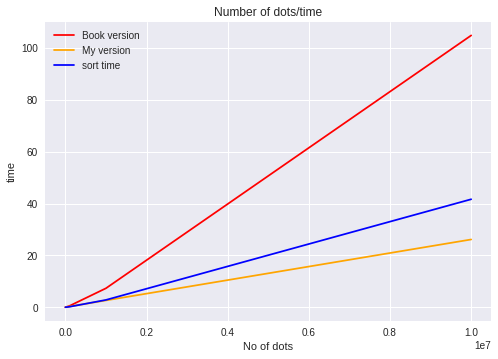

In [315]:
plt.title('Number of dots/time')
plt.xlabel('No of dots')
plt.ylabel('time')
plt.plot(Ns, time_v1, color='red', label='Book version')
plt.plot(Ns, time_v2, color='orange', label='My version')
plt.plot(Ns, time_sort, color='blue', label='sort time')
plt.legend()
plt.show()

In [316]:
for (i, n) in enumerate(Ns):
  print('n: ', n)
  print('n*log(n): ', n*np.log(n))
  start = timeit.default_timer()
  for j in range(int(n*np.log(n))):
    j += 1
  stop = timeit.default_timer()
  print('O(n*log(n)): ', stop-start)
  print('time_sort[n]: ', time_sort[i])
  print('time_v1[n]: ', time_v1[i])
  print('time_v2[n]: ', time_v2[i], '\n')

n:  1
n*log(n):  0.0
O(n*log(n)):  6.976700024097227e-05
time_sort[n]:  3.2059997465694323e-06
time_v1[n]:  1.4568999176844954e-05
time_v2[n]:  1.446599890186917e-05 

n:  10
n*log(n):  23.02585092994046
O(n*log(n)):  4.4641999920713715e-05
time_sort[n]:  5.578000127570704e-06
time_v1[n]:  2.373500137764495e-05
time_v2[n]:  4.894700032309629e-05 

n:  100
n*log(n):  460.51701859880916
O(n*log(n)):  9.177099855151027e-05
time_sort[n]:  5.351999971026089e-05
time_v1[n]:  0.00019484400036162697
time_v2[n]:  0.00028338099946267903 

n:  1000
n*log(n):  6907.755278982137
O(n*log(n)):  0.0008550279999326449
time_sort[n]:  0.0007236920009745518
time_v1[n]:  0.002181826999731129
time_v2[n]:  0.0028198280015203636 

n:  10000
n*log(n):  92103.40371976183
O(n*log(n)):  0.010754208000435028
time_sort[n]:  0.010382888000094681
time_v1[n]:  0.03188218200011761
time_v2[n]:  0.027472295998450136 

n:  100000
n*log(n):  1151292.546497023
O(n*log(n)):  0.13416586600033042
time_sort[n]:  0.1675680160005

### Dinamic use

In [0]:
# Special benefits of my methods in online version of this problem
# Real time application etc.
# Imagine my dots come through time, and in every moment I need to now live unions of segments (coverage) and it length
# In v1, I need to sort my array for every new dot (ok, I can modify this, just binary insert :))

# DOCUMENTATION

In [320]:
import gc
gc.collect()

5630

In [0]:
Ns = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
time_v1 = []
time_v2 = []
time_sort = []
dots = []

for n in Ns:
  for i in range(n):
    dot = random.uniform(RANGE_MIN, RANGE_MAX)
    dots.append((dot, dot+random.uniform(0, EPS)))
    
  i = Intervaler()
  start = timeit.default_timer()
  _, t = i.calculate_length(dots)
  stop = timeit.default_timer()
  time_v2.append(stop-start)
  
  
  start = timeit.default_timer()
  _, t = calculate_lenghth_v1(dots)
  stop = timeit.default_timer()
  time_v1.append(stop-start)
  
  start = timeit.default_timer()
  dots.sort(key=lambda x: (x[0], int(x[1])))
  stop = timeit.default_timer()
  time_sort.append(stop-start)
  
  del i
  dots.clear()

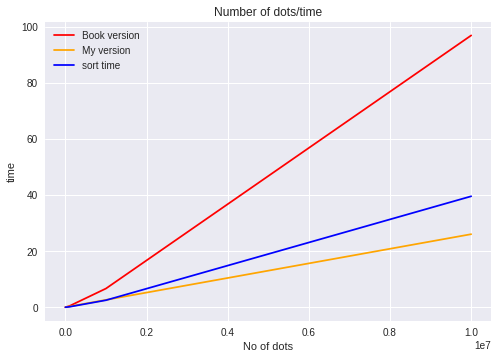

In [7]:
plt.title('Number of dots/time')
plt.xlabel('No of dots')
plt.ylabel('time')
plt.plot(Ns, time_v1, color='red', label='Book version')
plt.plot(Ns, time_v2, color='orange', label='My version')
plt.plot(Ns, time_sort, color='blue', label='sort time')
plt.legend()
plt.show()